<a href="https://colab.research.google.com/github/ras1364/DetectFakeReviewsUsing-Sentence_BERT/blob/main/FakeReviewDetectionUsingSentenceBertVer3_1_0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In this code, comments are sent to the Sentence BERT encoder regardless of the number of sentences, and its output is sent to the Dence network.**

In [121]:
import pandas as pd
import numpy as np

In [122]:
from google.colab import files
uploaded = files.upload()

Saving X_test.csv to X_test (1).csv
Saving X_train.csv to X_train (1).csv
Saving y_test.csv to y_test (1).csv
Saving y_train.csv to y_train (1).csv


In [123]:
X_test = pd.read_csv("/content/X_test.csv")
X_train = pd.read_csv("/content/X_train.csv")
y_test = pd.read_csv("/content/y_test.csv")
y_train = pd.read_csv("/content/y_train.csv")

In [124]:
max_length = 384
for x in range(0,len(X_train)):
  line = X_train.loc[x].at["text"]
  if max_length < len(line.split()) :
    max_length = len(line.split())

print(max_length)


649


In [125]:
from gensim.parsing.preprocessing import remove_stopwords

def preprocess(text):
  return remove_stopwords(text)

X_train["stemmed_text_data"] = X_train["text"].map(preprocess)
X_test["stemmed_text_data"] = X_test["text"].map(preprocess)

In [126]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [127]:
X_train_encoded = sbert_model.encode(X_train["stemmed_text_data"] ,  show_progress_bar=True)
X_test_encoded = sbert_model.encode(X_test["stemmed_text_data"], show_progress_bar=True)

Batches:   0%|          | 0/38 [00:00<?, ?it/s]

Batches:   0%|          | 0/13 [00:00<?, ?it/s]

In [128]:
print("X_train.shape = " , X_train_encoded.shape, " y_train.shape = ", y_train["deceptive"].shape)
print("X_test.shape = " , X_test_encoded.shape, " y_test.shape = ", y_test["deceptive"].shape)

X_train.shape =  (1200, 384)  y_train.shape =  (1200,)
X_test.shape =  (400, 384)  y_test.shape =  (400,)


In [163]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# define and fit the final model
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
   ] 
model = Sequential()
model.add(Dense(64, input_shape=(384,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS)

In [164]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 64)                24640     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_37 (Dense)            (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_38 (Dense)            (None, 1)                 33        
                                                                 
Total params: 26,753
Trainable params: 26,753
Non-trainable params: 0
_________________________________________________________________


In [165]:
y_train_final = y_train.deceptive
model.fit(X_train_encoded,y_train_final, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
19/19 [==============================] - 2s 6ms/step - loss: 0.6847 - accuracy: 0.5817 - precision: 0.6189 - recall: 0.4250
Epoch 2/100
19/19 [==============================] - 0s 7ms/step - loss: 0.6527 - accuracy: 0.7025 - precision: 0.7314 - recall: 0.6400
Epoch 3/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6010 - accuracy: 0.7325 - precision: 0.7560 - recall: 0.6867
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 0.5422 - accuracy: 0.7625 - precision: 0.7683 - recall: 0.7517
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 0.4846 - accuracy: 0.7817 - precision: 0.7975 - recall: 0.7550
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 0.4481 - accuracy: 0.7983 - precision: 0.8055 - recall: 0.7867
Epoch 7/100
19/19 [==============================] - 0s 5ms/step - loss: 0.4242 - accuracy: 0.8125 - precision: 0.8216 - recall: 0.7983
Epoch 8/100
19/19 [=============================

In [166]:
model.evaluate(X_test_encoded, y_test.deceptive)

13/13 [==============================] - 0s 3ms/step - loss: 0.7204 - accuracy: 0.8300 - precision: 0.8548 - recall: 0.7950


[0.7204470634460449,
 0.8299999833106995,
 0.8548387289047241,
 0.7950000166893005]

In [167]:
y_predicted = model.predict(X_test_encoded)
y_predicted = y_predicted.flatten()

13/13 [==============================] - 0s 2ms/step


In [168]:
import numpy as np
y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,

In [169]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test.deceptive, y_predicted)
cm 

array([[173,  27],
       [ 41, 159]])

Text(33.0, 0.5, 'Truth')

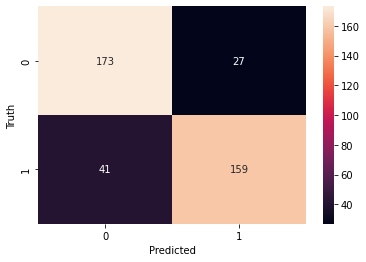

In [170]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [171]:
print(classification_report(y_test.deceptive, y_predicted))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       200
           1       0.85      0.80      0.82       200

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400

